## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_merge = pd.merge(mouse_metadata, study_results, on ="Mouse ID")


# Display the data table for preview
mice_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = mice_merge["Mouse ID"].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mice_merge.loc[mice_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

# Checking the number of mice.
duplicate_mouse_ids = mice_merge.loc[mice_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID.  
duplicate_mouse_data = mice_merge.loc[mice_merge["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mice_merge[mice_merge['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean["Tumor Volume (mm3)"]
mean_tumor =  np.mean(tumor)
median_tumor = np.median(tumor)
mode_tumor = sts.mode(tumor)
var_tumor = np.var(tumor)
sd_tumor = np.std(tumor)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_group = clean.groupby(["Drug Regimen"])
tumor_g = tumor_group["Tumor Volume (mm3)"].mean()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
median_tumor_g = tumor_group["Tumor Volume (mm3)"].median()
var_tumor_g = tumor_group["Tumor Volume (mm3)"].var()
sd_tumor_g = tumor_group["Tumor Volume (mm3)"].std()
SEM_g = tumor_group["Tumor Volume (mm3)"].sem()
summary_table = pd.DataFrame({"Mean": tumor_g, "Median": median_tumor_g,
                             "Variance": var_tumor_g, "Standard Deviation":
                             sd_tumor_g,
                             "SEM": SEM_g})
# Assemble the resulting series into a single summary dataframe.
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Count of Drugs')

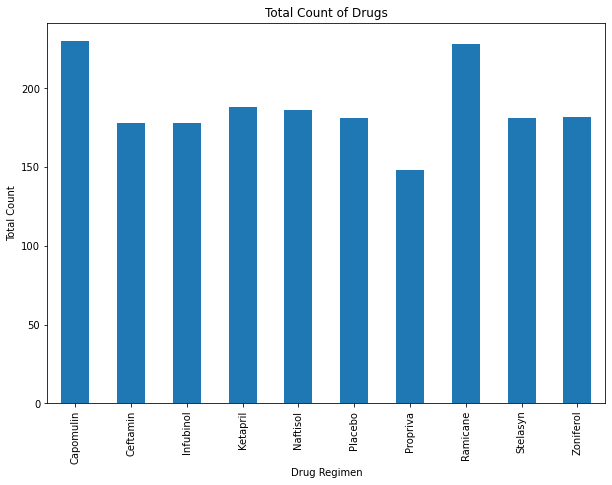

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = tumor_group["Drug Regimen"].count()
aq = count_regimen.plot( kind="bar", figsize=(10,7))
aq.set_ylabel('Total Count')
aq.set_title('Total Count of Drugs')

Text(0, 0.5, 'Total Measurements')

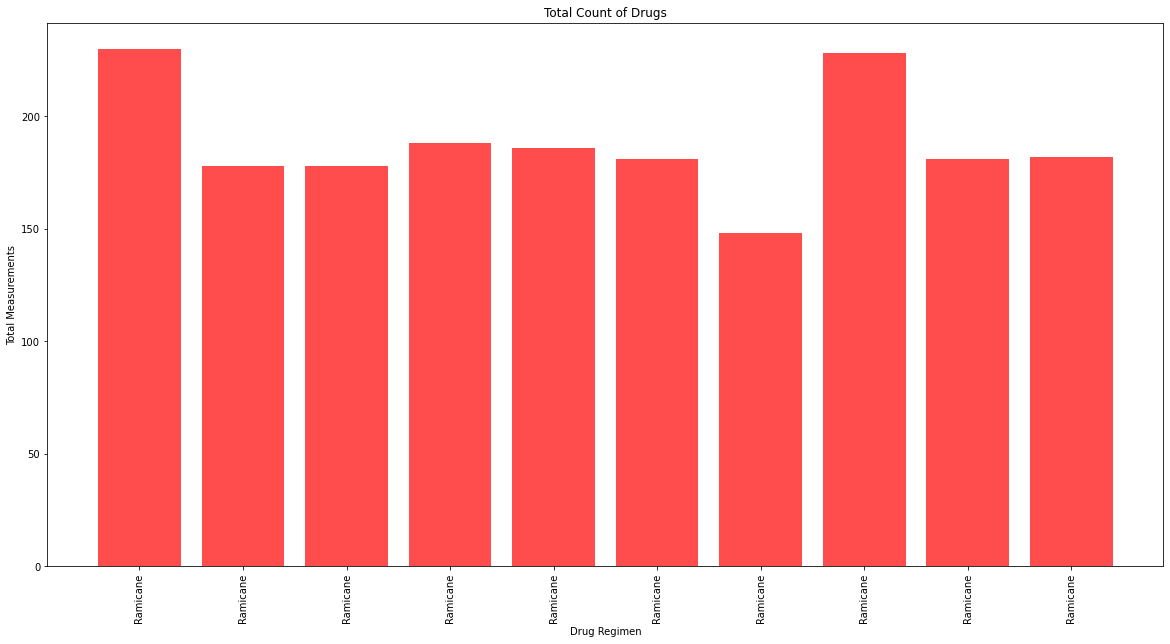

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count= pd.DataFrame({"Total Counts": count_regimen})
x_axis = np.arange(len(count))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,10))
plt.bar(x_axis, count["Total Counts"], color='r', alpha=0.7, align="center")
plt.xticks(tick_locations, clean["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Total Count of Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

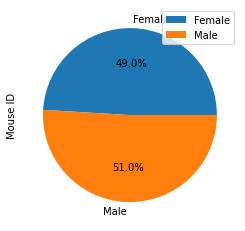

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1c77f324520>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Male'),
  Text(1.0995024239828841, 0.033082014082615026, 'Female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

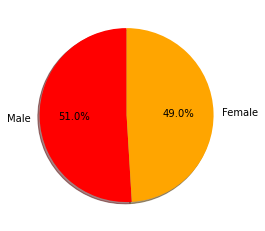

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Male", "Female"]
sex = clean['Sex'].value_counts()
colors = ["red", "orange"]

plt.pie(sex, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean, on=['Mouse ID','Timepoint'], how="left")
merged_data2 = merged_data[['Drug Regimen', 'Tumor Volume (mm3)']]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    if outliers.empty:
        print(f"{drug} doesn't seem to have any outliers")
    else:
        print(f"{drug}'s potential outliers: {outliers}")

Capomulin doesn't seem to have any outliers
Ramicane doesn't seem to have any outliers
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin doesn't seem to have any outliers


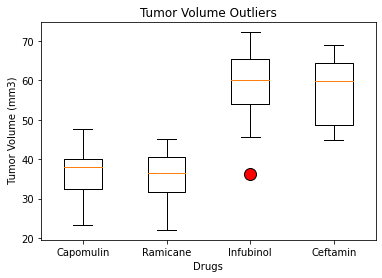

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_list, labels = treatment, flierprops=orange_out)
plt.xlabel('Drugs')
plt.ylabel(" Tumor Volume (mm3)")
plt.title('Tumor Volume Outliers')
plt.show()

## Line and Scatter Plots

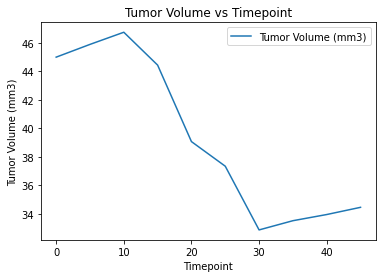

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b = clean.loc[clean['Drug Regimen'] == 'Capomulin']
a = b.loc[b["Mouse ID"] == "t565"]
ax = plt.gca()

adt = a.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax)
adt.set_ylabel('Tumor Volume (mm3)')
adt.set_title('Tumor Volume vs Timepoint')
plt.show()

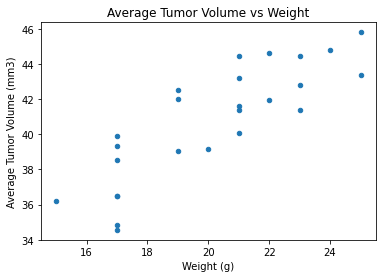

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg = clean.loc[clean['Drug Regimen'] == 'Capomulin']
avg2 = avg.groupby(["Mouse ID"])
avg3 = avg2["Tumor Volume (mm3)"].mean()
weight = avg2['Weight (g)'].max()
avg4 = pd.DataFrame ({"Average Tumor Volume (mm3)":avg3, "Weight (g)": weight})
ax = plt.gca()

asl = avg4.plot(kind='scatter',x='Weight (g)',y='Average Tumor Volume (mm3)',ax=ax)
asl.set_title('Average Tumor Volume vs Weight')

plt.show()


## Correlation and Regression

r-squared= 0.7088568047708717


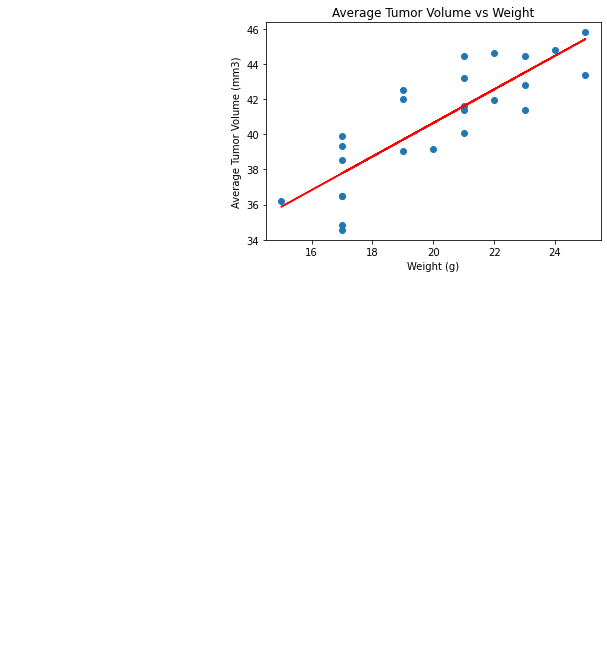

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg4['Weight (g)']
y_values = avg4["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs Weight')
print(f"r-squared= {rvalue**2}")
plt.show()
